## Overview

1. Model performance Evaluation
2. Grid Search
3. Compare all classifiers
4. Stacking
5. Learning curve
6. Trained by Deep learning
7. Apply best parameters

## Prepare dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
######  Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from mlxtend.classifier import StackingClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

F:\Programming\Aanconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
### Read Datset  


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None,dtype = {'type':np.int32} )

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()




Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#### df[row,column]

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 1)
## Standardize  ###

from sklearn.preprocessing import StandardScaler

sc=  StandardScaler()

### Fit the training set
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



In [5]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(C = 1.0,kernel = 'rbf',probability  =True)
svc.fit(X_train_std,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Model performance evaluation

- classification report
- confusion matrix
- classifier score
- cross validation score
- Accuracy, precision, recall, f1 for testing set
- Stratified K-Fold scores

In [10]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
### 1. Create score table
print(metrics.classification_report(y_test,svc.predict(X_test_std)))

#### 2. confusion matrix
print(metrics.confusion_matrix(y_test,svc.predict(X_test_std)),'\n')


#### 3. Classifier score
#### can use in training or testing

print("accuracy score = ", svc.score(X_test_std,y_test))

### 4. cross validation score >> for training set

print("Average Cross validation score:",cross_val_score(estimator = svc
                                                ,X = X_train_std
                                                ,y = y_train
                                                ,scoring = 'accuracy'
                                                ,cv = 5).mean())

print("F1 Macro Cross validation score:",cross_val_score(estimator = svc
                                                ,X = X_train_std
                                                ,y = y_train
                                                ,scoring = 'f1_macro'
                                                ,cv = 5).mean())


print("precision_macro Cross validation score:",cross_val_score(estimator = svc
                                                ,X = X_train_std
                                                ,y = y_train
                                                ,scoring = 'precision_macro'
                                                ,cv = 5).mean())

print("recall Cross validation score:",cross_val_score(estimator = svc
                                                ,X = X_train_std
                                                ,y = y_train
                                                ,scoring = 'recall_macro'
                                                ,cv = 5).mean())

### 5. Acuracy, precision, F1, Recall for training / testing data

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
#### select average = ['binary','micro','macro','weighted']
#### 'macro' is label unweighted mean

#### Precision = TP/TP+FP
clf = SVC(kernel='rbf', C=1)
clf.fit(X_train_std,y_train)    
y_pred = clf.predict(X_train_std)
y_true = y_train

print("precision = ",precision_score(y_true = y_true, y_pred = y_pred,average = 'weighted'))

#### Recall  = TPR = TP/FN+TP

print("Recall = ", recall_score(y_true = y_true,y_pred = y_pred,average = 'weighted'))

print("F1 Score = ",f1_score(y_true = y_true,y_pred = y_pred,average = 'weighted'))

#### 6. StratifiedKFold >> used for imbalanced data


from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(y = y_train,n_folds = 3, random_state = 0)

scores = []
#### train test 為index 值
#### k為第幾個 fold
for k, (train,test) in enumerate(kfold):
    clf.fit(X_train_std[train],y_train[train])
    score = clf.score(X_train_std[test],y_train[test])
    scores.append(score)
    
print("Stratified K Fold Average score = ", np.mean(scores))



              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.98      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 0 19  0]
 [ 0  1 11]] 

accuracy score =  0.9814814814814815
Average Cross validation score: 0.9756666666666666
F1 Macro Cross validation score: 0.9755067155067154
precision_macro Cross validation score: 0.9777489177489176
recall Cross validation score: 0.9742857142857142
precision =  1.0
Recall =  1.0
F1 Score =  1.0


TypeError: __init__() got an unexpected keyword argument 'y'

## Grid Search
<p>scikit-learn example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html</p>
<p>scikit-learn    官網: http://scikit-learn.org/stable/</p>
<p>         中文教學說明: https://www.gitbook.com/book/htygithub/machine-learning-python/details </p>


<p> predict(X)  >> Call predict on the estimator with the best found parameters.</p>

<p>score(X, y=None)>> Returns the score on the given data, if the estimator has been refit.  </p>

In [13]:
### Grid Search demo example  ####

### 可先固定某些參數  ####
clf = SVC(C = 100)

#### Set tunning parameters in dictionary
params = [{'kernel':['rbf'], 'gamma': [0.01, 0.001]},
          {'kernel':['linear']}]

Gclf = GridSearchCV(clf,params,cv = 5,  scoring='precision_macro',n_jobs = -1)
Gclf.fit(X_train_std,y_train)

Gclf.cv_results_,Gclf.best_params_,Gclf.best_score_

### Use best parameters setting to predict
test_predict = Gclf.predict(X_test_std)
Gclf.score(X_test_std,y_test)

0.9833333333333334

In [14]:

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall', 'f1']
#F1 = 2 * (precision * recall) / (precision + recall)



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

for score in scores:
    print("# Tuning hyper-parameters for <%s> -------------" % score)
    print()
    
    clf = GridSearchCV(SVC(),tuned_parameters,cv = 5,
                    scoring = '%s_macro' % score)
    clf.fit(X_train,y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print("mean_test_score (+/- std_test_score) for {parameters..}")
    print("")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean,std*2,params))
        
    print()
    
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set")
    print("The scores are computed on the full evaluation set.")
    print()
    
    y_true,y_pred = y_test,clf.predict(X_test)
    print(classification_report(y_true,y_pred))
    print()

# Tuning hyper-parameters for <precision> -------------

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:
mean_test_score (+/- std_test_score) for {parameters..}

0.732 (+/-0.117) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.725 (+/-0.077) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.736 (+/-0.071) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.791 (+/-0.140) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.774 (+/-0.131) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.853 (+/-0.089) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.774 (+/-0.131) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.828 (+/-0.116) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.956 (+/-0.054) for {'C': 1, 'kernel': 'linear'}
0.956 (+/-0.054) for {'C': 10, 'kernel': 'linear'}
0.956 (+/-0.054) for {'C': 100, 'kernel': 'linear'}
0.956 (+/-0.054) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trai

# Classifier comparison

#### ref. https://machine-learning-python.kspax.io/Classification/ex4_Classifier_comparison.html

In [16]:
h =0.2  ## step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Ana.",
         "Quadratic Discriminant Ana.", "XGBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel = 'linear',C = 0.025,probability = True),
    SVC(kernel = 'rbf', C = 100, gamma = 0.001, probability = True),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5,n_estimators = 10, max_features = 1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(n_estimators = 2000, max_depth = 4)]



In [17]:
### iterate over classifiers

for name, clf in zip(names,classifiers):
    clf.fit(X_train_std,y_train)
    scores = clf.score(X_test_std,y_test)
    print("%r score: %0.04f" % (name,scores))
    
    y_true,y_pred = y_test,clf.predict(X_test_std)
    print(classification_report(y_true,y_pred))
    print(clf.predict(X_test_std))
    print("------------------------------------------------------")

'Nearest Neighbors' score: 0.9815
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 1 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1 1 2 1 1 1 2 3 3 1]
------------------------------------------------------
'Linear SVM' score: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[3 2 1 2 1 

## Use stacking to combine different model

In [11]:
clf1 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')
clf2 = RandomForestClassifier(n_estimators = 500,criterion = 'gini',max_features = 'auto',oob_score = True)
clf3 = GaussianNB()
clf4 = SVC(kernel = 'rbf', C =100,gamma = 0.001,probability = True)
clf5 = AdaBoostClassifier()
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()
clf8 = xgb.XGBClassifier(n_estimators = 2000, max_depth = 4)
meta_clf = LinearDiscriminantAnalysis()

stacking_clf1 = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8],meta_classifier = meta_clf)

clf1.fit(X_train_std,y_train)
clf2.fit(X_train_std,y_train)
clf3.fit(X_train_std,y_train)
clf4.fit(X_train_std,y_train)
clf5.fit(X_train_std,y_train)
clf6.fit(X_train_std,y_train)
clf7.fit(X_train_std,y_train)
clf8.fit(X_train_std,y_train)
stacking_clf1.fit(X_train_std,y_train)

print('KNN score:',clf1.score(X_test_std,y_test))
print('RF score:',clf2.score(X_test_std,y_test))
print('GNB score:',clf3.score(X_test_std,y_test))
print('SVC score:',clf4.score(X_test_std,y_test))
print('Adaboost score:',clf5.score(X_test_std,y_test))
print('L-Discr score:',clf6.score(X_test_std,y_test))
print('Q-Discr score:',clf7.score(X_test_std,y_test))
print('XGBOOST score:',clf8.score(X_test_std,y_test))
print('Stacking score:',stacking_clf1.score(X_test_std,y_test))
print("---------------------------------------------------")
print(stacking_clf1.predict(X_test_std))

KNN score: 0.981481481481
RF score: 0.981481481481
GNB score: 0.981481481481
SVC score: 0.981481481481
Adaboost score: 0.537037037037
L-Discr score: 1.0
Q-Discr score: 0.981481481481
XGBOOST score: 0.962962962963
Stacking score: 0.981481481481
---------------------------------------------------
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 1 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1 1 2 1 1 1 2 3 3 1]


## 比賽時  挑出表現較好的做Ensemble
#### (使用Voting 當example)

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

clf1 = LinearDiscriminantAnalysis()
clf2 = QuadraticDiscriminantAnalysis()
clf3 = xgb.XGBClassifier(n_estimators = 2000, max_depth = 4)

eclf2 = VotingClassifier(estimators = [('Lda', clf1),('Qda',clf2),('XGB',clf3)]
                        ,voting = 'hard',weights = [1,1,1])

eclf2.fit(X_train_std,y_train)

print(metrics.classification_report(y_test,eclf2.predict(X_test_std)))
print("--------------------------------------------------------------")
print(eclf2.predict(X_test_std))

             precision    recall  f1-score   support

          1       0.96      1.00      0.98        23
          2       1.00      0.95      0.97        19
          3       1.00      1.00      1.00        12

avg / total       0.98      0.98      0.98        54

--------------------------------------------------------------
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 1 2 1 1 2 3 1 1 1 2 1 1 1 2 3 3 1]


# Learning Curve

- Deal with overfitting

<p> A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. In the following plot you can see an example: naive Bayes roughly converges to a low score. </p>

- cv parameters can be integer or generator (KFold)

### KFold(n_splits ,random_state,shuffle)

- Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

- This is a gnenrator object



In [13]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
### cv can be generator

def plot_learning_curve(estimator, title,X,y,ylim = None,cv = None,
                       n_jobs = -1,train_sizes = np.linspace(0.1,1.0,5)):
    
    plt.figure(figsize = (10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
    estimator,X,y,cv = cv,n_jobs = n_jobs, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores,axis = 1)
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores,axis = 1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha = 0.1)
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std,alpha = 0.1)
    
    plt.plot(train_sizes,train_scores_mean,'o-',color = "r",
            label = "Training score")
    
    plt.plot(train_sizes,test_scores_mean,'o-',color = "g",
            label="Cross-validation score")
    
    plt.legend(loc = 'best')
    
    return plt
    


Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'E:\\Programming\\Python\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

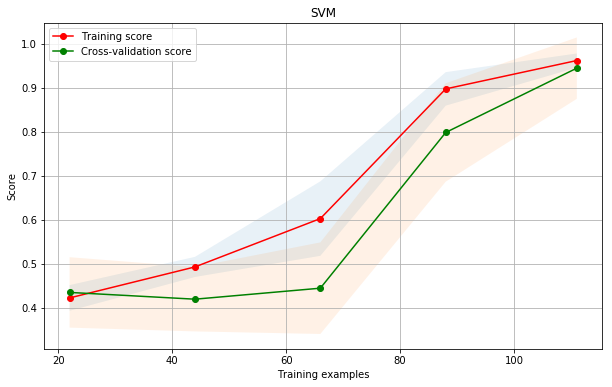

In [14]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10,random_state = None,shuffle = True)
estimator = SVC(C = 0.1,kernel = 'rbf',probability = True)
%matplotlib inline
plot_learning_curve(estimator,"SVM",X_train_std,y_train,cv = cv,train_sizes = np.linspace(0.2,1.0,5))

<module 'matplotlib.pyplot' from 'E:\\Programming\\Python\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

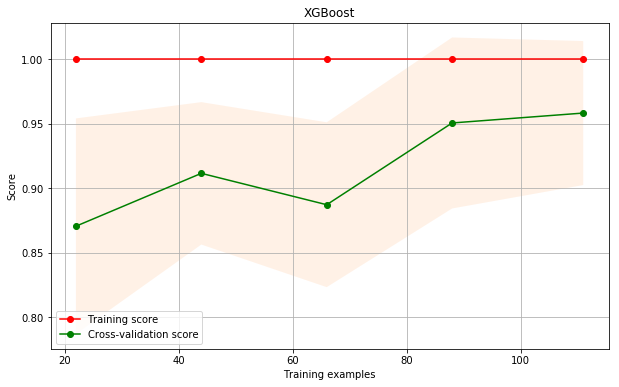

In [15]:
cv = KFold(n_splits = 10,random_state = None,shuffle = True)
estimator = xgb.XGBClassifier(n_estimators = 2000,max_depth = 4)

plot_learning_curve(estimator, "XGBoost",X_train_std,y_train,cv = cv,train_sizes = np.linspace(0.2,1.0,5))

<module 'matplotlib.pyplot' from 'E:\\Programming\\Python\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

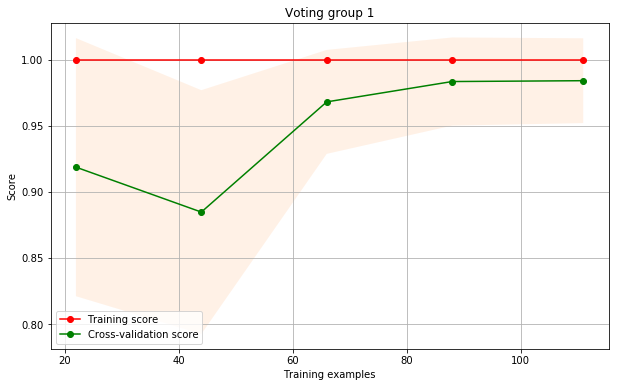

In [16]:
cv = KFold(n_splits = 10,random_state = None,shuffle = True)
estimator = eclf2
plot_learning_curve(estimator,"Voting group 1",X_train_std, y_train,cv = cv,train_sizes = np.linspace(0.2,1.0,5))

### Use Deep Learning to train (optional)

In [17]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

def create_model(optimizer='adam', init='normal'):
    model = Sequential()
    model.add(Dense(512, input_dim=13, activation='relu', kernel_initializer=init))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer=init))
    model.add(Dense(64, activation='relu', kernel_initializer=init))
    model.add(Dense(3, activation='softmax', kernel_initializer=init))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

Using TensorFlow backend.


In [18]:
'''
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = create_model,verbose = 0)

optimizers = ['rmsprop','adam']
init = ['glorot_uniform','normal','uniform']
epochs = [10,20,50]
batches = [5,10,20]

param_grid = dict(optimizer = optimizers,epochs = epochs,batch_size = batches, init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grid)
grid_result = grid.fit(X_train_std,y_train)

print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))
    
    '''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\n\nmodel = KerasClassifier(build_fn = create_model,verbose = 0)\n\noptimizers = [\'rmsprop\',\'adam\']\ninit = [\'glorot_uniform\',\'normal\',\'uniform\']\nepochs = [10,20,50]\nbatches = [5,10,20]\n\nparam_grid = dict(optimizer = optimizers,epochs = epochs,batch_size = batches, init = init)\ngrid = GridSearchCV(estimator = model,param_grid = param_grid)\ngrid_result = grid.fit(X_train_std,y_train)\n\nprint("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))\n\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means,stds,params):\n    print("%f (%f) with: %r" % (mean,stdev,param))\n    \n    '

## Use best setting 

- Best: 0.983871 using {'init': 'glorot_uniform', 'optimizer': 'adam', 'epochs': 10, 'batch_size': 20}

In [ ]:
def c_model(optimizer = 'adam', init = 'glorot_uniform'):
    model = Sequential()
    model.add(Dense(512,input_dim = 13,activation = 'relu',kernel_initializer = init))
    model.add(Dense(256,activation = 'relu', kernel_initializer = init))
    model.add(Dense(64,activation = 'relu', kernel_initializer = init))
    model.add(Dense(3,activation = 'softmax',kernel_initializer = init))
    model.compile(optimizer = optimizer,loss = 'categorical_crossentropy',metrics = ['accuracy'])
    
    return model


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasClassifier(build_fn=c_model, nb_epoch=20, batch_size=5,verbose = True)

plot_learning_curve(estimator, "MLP with Keras", X_train_std, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5),)